In [1]:
# grab the functions for making the measurements with the group data
include("../src/obs_funcs.jl")
import .Jackknife.get_sdss_subvols
import Cairo, Fontconfig

┌ Info: Loading DataFrames support into Gadfly.jl
└ @ Gadfly /home/users/kww231/.julia/packages/Gadfly/09PWZ/src/mapping.jl:228
┌ Info: Recompiling stale cache file /home/users/kww231/.julia/compiled/v0.7/Cairo/l6vnT.ji for Cairo [159f3aea-2a34-519c-b102-8c37f9878175]
└ @ Base loading.jl:1185
┌ Info: Loading Cairo backend into Compose.jl
└ @ Compose /home/users/kww231/.julia/packages/Compose/HnEPK/src/Compose.jl:164
┌ Info: Recompiling stale cache file /home/users/kww231/.julia/compiled/v0.7/Fontconfig/k95Ux.ji for Fontconfig [186bb1d3-e1f7-5a2c-a377-96d770f13627]
└ @ Base loading.jl:1185
┌ Warning: [TEMPORARY WORKAROUND, pangolayout] for plotting with Gadfly.jl, see https://github.com/GiovineItalia/Gadfly.jl/issues/1206
└ @ Compose /home/users/kww231/.julia/packages/Compose/HnEPK/src/pango.jl:67
┌ Warning: Error requiring Fontconfig from Compose:
│ LoadError: UndefVarError: pango_cairo_ctx not defined
│ Stacktrace:
│  [1] Compose.PangoLayout() at /home/users/kww231/.julia/packages/Com

In [2]:
# build the data sample from the group finding catalog
# the function also finds the sample volumes from the redshift range
galdf, samplevols = load_groupdat()

┌ Warning: broadcast will default to iterating over its arguments in the future. Wrap arguments of
│ type `x::Cosmology.FlatLCDM{Float64}` with `Ref(x)` to ensure they broadcast as "scalar" elements.
│   caller = ip:0x0
└ @ Core :-1


(49460×46 DataFrame. Omitted printing of 40 columns
│ Row   │ foo     │ galid  │ groupid │ cenid  │ rband    │ Psat       │
│       │ String⍰ │ Int64⍰ │ Int64⍰  │ Int64⍰ │ Float64⍰ │ Float64⍰   │
├───────┼─────────┼────────┼─────────┼────────┼──────────┼────────────┤
│ 1     │ PROB10  │ 99     │ 11864   │ 99     │ -18.7129 │ 0.0        │
│ 2     │ PROB10  │ 237    │ 12835   │ 237    │ -18.4337 │ 0.0        │
│ 3     │ PROB10  │ 1071   │ 9313    │ 1071   │ -19.0647 │ 0.0        │
│ 4     │ PROB10  │ 1142   │ 12588   │ 1142   │ -21.3599 │ 4.17232e-6 │
│ 5     │ PROB10  │ 1357   │ 13957   │ 1357   │ -18.3485 │ 0.0        │
│ 6     │ PROB10  │ 1687   │ 10907   │ 1687   │ -19.039  │ 0.0        │
│ 7     │ PROB10  │ 4363   │ 12123   │ 4363   │ -18.6763 │ 0.433692   │
│ 8     │ PROB10  │ 4422   │ 14275   │ 4422   │ -18.3114 │ 0.0        │
│ 9     │ PROB10  │ 4629   │ 13300   │ 4629   │ -18.458  │ 0.0        │
│ 10    │ PROB10  │ 4753   │ 10901   │ 4753   │ -18.7568 │ 0.0        │
⋮
│ 49450 │ 

In [3]:
# compute the jackknife subvolumes that our selected sample belongs to
radecs = zeros(size(galdf)[1], 2)
radecs[:, 1] = rad2deg.(galdf[:ra])
radecs[:, 2] = rad2deg.(galdf[:dec])

galdf[:jackvol] = get_sdss_subvols(radecs)

49460-element Array{Int64,1}:
  2
  2
 21
 11
 11
 16
 21
 21
 11
 11
 16
 16
  6
  ⋮
  7
  7
  7
  7
  7
  7
  7
  6
  6
  6
  6
  6

In [4]:
# define the galaxy mass samples with the following bin edges in log10(M*)
const nmbins = 4
const logMedges = [9.4, 9.8, 10.3, 10.6, 11.0]
const mlabels = [9.7, 10.1, 10.4, 10.7]  # these values are closest to the bin means/medians
const meanMs = Array{Float64}(undef, nmbins)

for i in 1:nmbins
    meanM = mean(galdf[:log10M][logMedges[i] .<= galdf[:log10M] .< logMedges[i + 1]])
    meanMs[i] = meanM
end

In [5]:
# similarly, define the bin edges in log10(δ + 1)
const ndbins = 8
const dbinedges = collect(range(-0.8, stop = 1.0, length = 9))
const dmeans = Array{Float64}(undef, 4, 8)

for i in 1:nmbins
    massdf = galdf[logMedges[i] .<= galdf[:log10M] .< logMedges[i + 1], :]
    for j in 1:ndbins
        meand = mean(massdf[:logρ][dbinedges[j] .<= massdf[:logρ] .< dbinedges[j + 1]])
        dmeans[i, j] =  meand
    end
end

Add `using LinearAlgebra` to your imports.
  likely near /home/users/kww231/.julia/packages/IJulia/DL02A/src/kernel.jl:41
Add `using LinearAlgebra` to your imports.
  likely near /home/users/kww231/.julia/packages/IJulia/DL02A/src/kernel.jl:41
Add `using LinearAlgebra` to your imports.
  likely near /home/users/kww231/.julia/packages/IJulia/DL02A/src/kernel.jl:41
Add `using LinearAlgebra` to your imports.
  likely near /home/users/kww231/.julia/packages/IJulia/DL02A/src/kernel.jl:41
Add `using LinearAlgebra` to your imports.
  likely near /home/users/kww231/.julia/packages/IJulia/DL02A/src/kernel.jl:41
Add `using LinearAlgebra` to your imports.
  likely near /home/users/kww231/.julia/packages/IJulia/DL02A/src/kernel.jl:41
┌ Warning: `Array{T}(m::Int) where T` is deprecated, use `Array{T}(undef, m)` instead.
│   caller = envmeans(::DataFrame, ::Symbol, ::Array{Float64,1}) at obs_funcs.jl:180
└ @ Main /home/users/kww231/dev/cenquenbias/src/obs_funcs.jl:180


logMₛ = 9.7
rₛ = 0.60
χ² = 4.6
χ²_ν = 0.8
p = 0.596
   
logMₛ = 10.1
rₛ = 0.67
χ² = 12.9
χ²_ν = 2.2
p = 0.045
   
logMₛ = 10.4
rₛ = 0.75
χ² = 10.1
χ²_ν = 1.7
p = 0.122
   


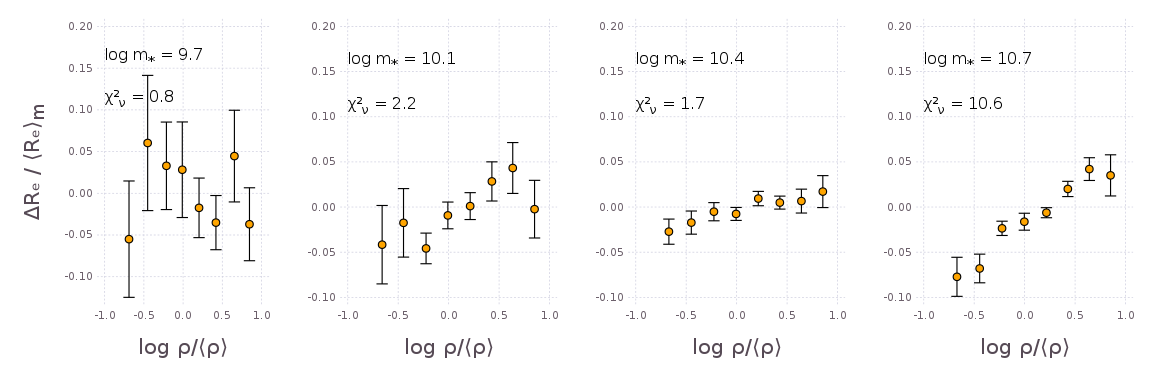

logMₛ = 10.7
rₛ = 0.87
χ² = 63.4
χ²_ν = 10.6
p = 0.000
   


In [6]:
# now to plot some variations in galaxy properties
# start with the effective radius
galdf[:Rₑ] = galdf[:R_e]
yticks = collect(-0.1:0.05:0.2)
annotatevals = [-1, 6]
replot = massenv_plot(galdf, "Rₑ",
                      yticks, annotatevals,
                      dbinedges, dmeans,
                      ptcolor = "orange")


draw(SVG("finfigs/finplot_Re_d.svg", 12inch, 4inch), replot)  # an svg for the paper
draw(PDF("finfigs/finplot_Re_d.pdf", 12inch, 4inch), replot)  
draw(PNG("finfigs/finplot_Re_d.png", 12inch, 4inch), replot)
display("image/png", read("finfigs/finplot_Re_d.png"))

logMₛ = 9.7
rₛ = 0.87
χ² = 9.6
χ²_ν = 1.6
p = 0.143
   
logMₛ = 10.1
rₛ = 0.96
χ² = 7.6
χ²_ν = 1.3
p = 0.273
   


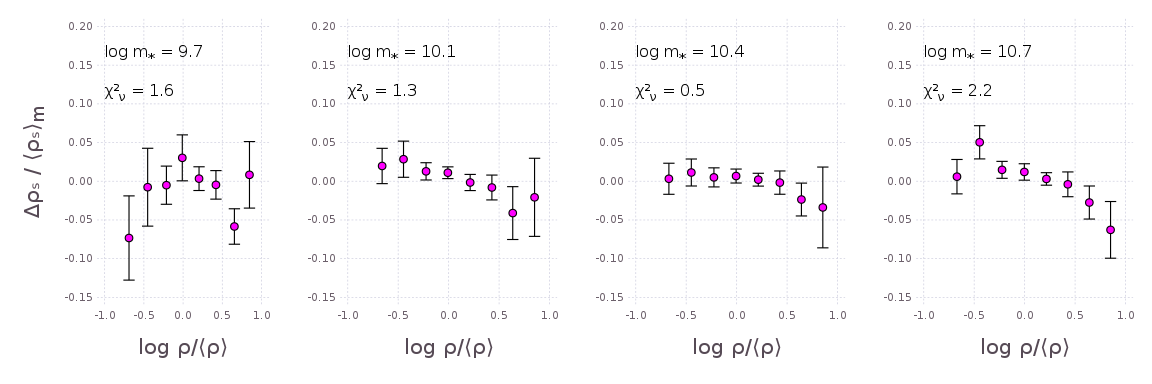

logMₛ = 10.4
rₛ = 0.94
χ² = 2.9
χ²_ν = 0.5
p = 0.821
   
logMₛ = 10.7
rₛ = 0.97
χ² = 13.5
χ²_ν = 2.2
p = 0.036
   


In [7]:
# here's surface density at Rₑ/2
galdf[:ρₛ] = galdf[:surfdensR_eo2]
yticks = collect(-0.15:0.05:0.2)
annotatevals = [-1, 7]
surfplot = massenv_plot(galdf, "ρₛ",
                        yticks, annotatevals,
                        dbinedges, dmeans,
                        ptcolor = "magenta")

draw(SVG("finfigs/finplot_surfdens_d.svg", 12inch, 4inch), surfplot)
draw(PDF("finfigs/finplot_surfdens_d.pdf", 12inch, 4inch), surfplot)
draw(PNG("finfigs/finplot_surfdens_d.png", 12inch, 4inch), surfplot)
display("image/png", read("finfigs/finplot_surfdens_d.png"))

logMₛ = 9.7
rₛ = 0.92
χ² = 3.9
χ²_ν = 0.7
p = 0.685
   
logMₛ = 10.1
rₛ = 0.94
χ² = 13.1
χ²_ν = 2.2
p = 0.041
   
logMₛ = 10.4
rₛ = 0.97
χ² = 42.1
χ²_ν = 7.0
p = 0.000
   


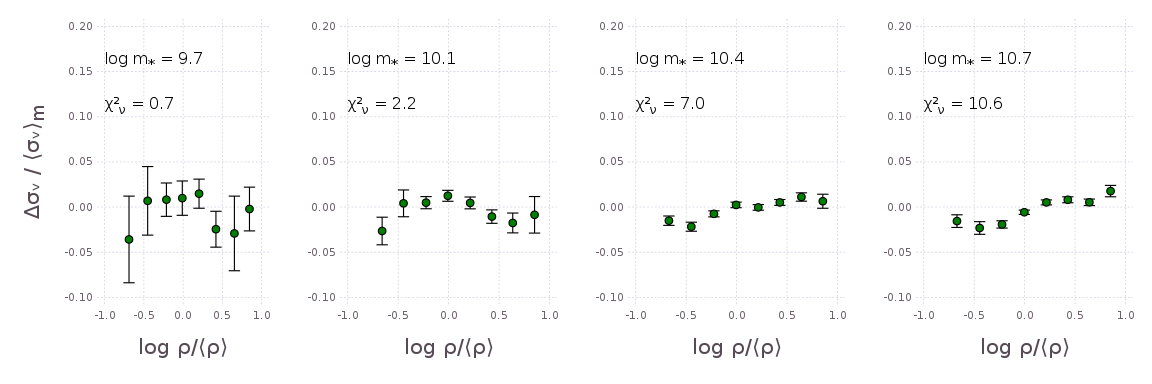

logMₛ = 10.7
rₛ = 0.96
χ² = 63.7
χ²_ν = 10.6
p = 0.000
   


In [8]:
# now for velocity dispersion
galdf[:σᵥ] = galdf[:vdisp]
yticks = collect(-0.1:0.05:0.20)
annotatevals = [-1, 6]
vdispplot = massenv_plot(galdf, "σᵥ",
                         yticks, annotatevals,
                         dbinedges, dmeans,
                         ptcolor = "green")

draw(SVG("finfigs/finplot_vdisp_d.svg", 12inch, 4inch), vdispplot)
draw(PDF("finfigs/finplot_vdisp_d.pdf", 12inch, 4inch), vdispplot)
draw(PNG("finfigs/finplot_vdisp_d.png", 12inch, 4inch), vdispplot)
display("image/png", read("finfigs/finplot_vdisp_d.png"))